In [6]:
# SVM, Random Forest, Gradient Boost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [3]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [55]:
df = pd.read_csv('loan_data.csv')

In [56]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)   

### data pre-processing

In [57]:
print('percentage null records')
for i in range(df.shape[1]):
    per_null=df.iloc[:,i].isnull().mean()*100
    col = df.columns[i]
    print(i,' : ', col,' : ',  per_null)


percentage null records
0  :  SK_ID_CURR  :  0.0
1  :  TARGET  :  0.0
2  :  NAME_CONTRACT_TYPE  :  0.0
3  :  CODE_GENDER  :  0.0
4  :  FLAG_OWN_CAR  :  0.0
5  :  FLAG_OWN_REALTY  :  0.0
6  :  CNT_CHILDREN  :  0.0
7  :  AMT_INCOME_TOTAL  :  0.0
8  :  AMT_CREDIT  :  0.0
9  :  AMT_ANNUITY  :  0.003902299429939092
10  :  AMT_GOODS_PRICE  :  0.09040327012692229
11  :  NAME_TYPE_SUITE  :  0.42014757195677555
12  :  NAME_INCOME_TYPE  :  0.0
13  :  NAME_EDUCATION_TYPE  :  0.0
14  :  NAME_FAMILY_STATUS  :  0.0
15  :  NAME_HOUSING_TYPE  :  0.0
16  :  REGION_POPULATION_RELATIVE  :  0.0
17  :  DAYS_BIRTH  :  0.0
18  :  DAYS_EMPLOYED  :  0.0
19  :  DAYS_REGISTRATION  :  0.0
20  :  DAYS_ID_PUBLISH  :  0.0
21  :  OWN_CAR_AGE  :  65.9908100848425
22  :  FLAG_MOBIL  :  0.0
23  :  FLAG_EMP_PHONE  :  0.0
24  :  FLAG_WORK_PHONE  :  0.0
25  :  FLAG_CONT_MOBILE  :  0.0
26  :  FLAG_PHONE  :  0.0
27  :  FLAG_EMAIL  :  0.0
28  :  OCCUPATION_TYPE  :  31.345545362604916
29  :  CNT_FAM_MEMBERS  :  0.0006503832383

In [58]:
df.OCCUPATION_TYPE.replace(np.nan, 'unknown').value_counts()

unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [59]:
df[df.OCCUPATION_TYPE.isnull()].NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    71335
Higher education                 20726
Incomplete higher                 2366
Lower secondary                   1907
Academic degree                     57
Name: NAME_EDUCATION_TYPE, dtype: int64

In [60]:
df.groupby('NAME_EDUCATION_TYPE')['OCCUPATION_TYPE'].apply(lambda x: x.mode().iloc[0])

NAME_EDUCATION_TYPE
Academic degree                    Managers
Higher education                 Core staff
Incomplete higher                  Laborers
Lower secondary                    Laborers
Secondary / secondary special      Laborers
Name: OCCUPATION_TYPE, dtype: object

In [61]:
df[df.NAME_EDUCATION_TYPE=='Secondary / secondary special'].OCCUPATION_TYPE.value_counts()

Laborers                 46282
Sales staff              24835
Drivers                  15808
Core staff               12643
Managers                  8847
Medicine staff            7315
High skill tech staff     6106
Security staff            5643
Cooking staff             5336
Cleaning staff            4244
Accountants               3544
Private service staff     2006
Low-skill Laborers        1889
Waiters/barmen staff      1058
Secretaries                724
Realty agents              474
HR staff                   170
IT staff                   132
Name: OCCUPATION_TYPE, dtype: int64

In [62]:
df.OCCUPATION_TYPE.mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

`since most of the missing OCCUPATION_TYPE is having NAME_EDUCATION_TYPE=='Secondary / secondary special'
and among them most of them are Laborers
therefore replacing missing OCCUPATION_TYPE with mode`

In [63]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna(df.OCCUPATION_TYPE.mode().iloc[0])

44


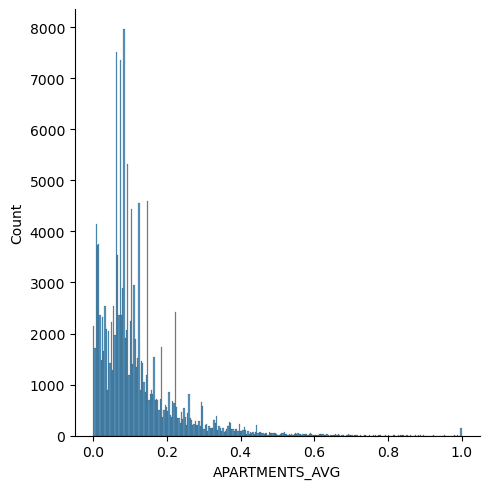

45


46


47


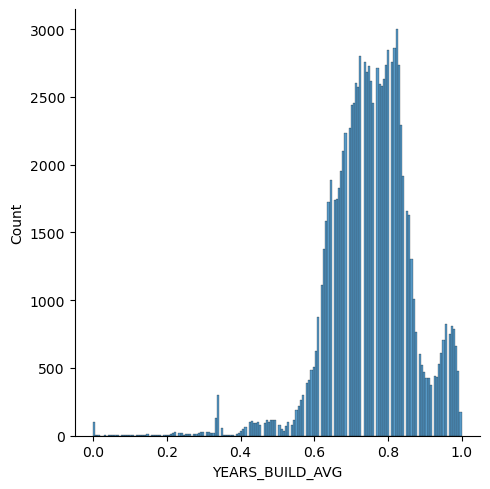

48


49


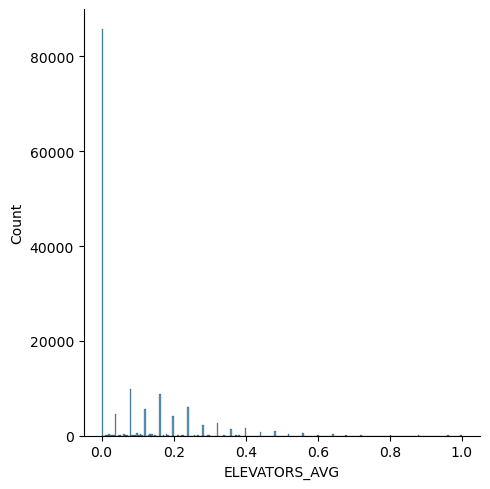

50


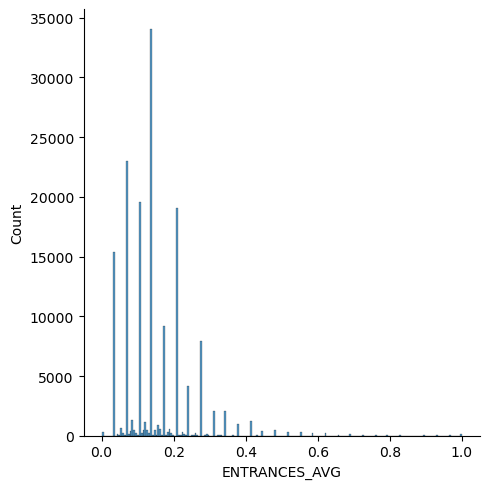

51


52


53


54


55


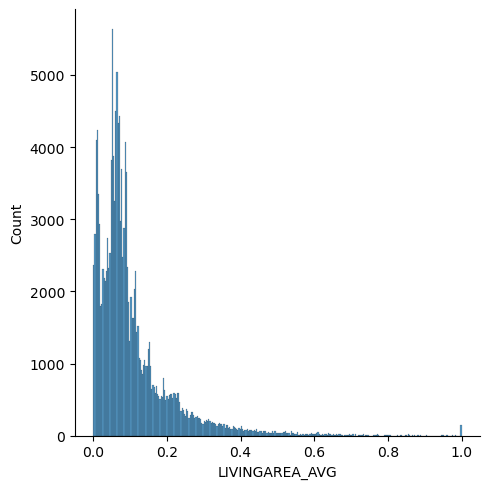

56


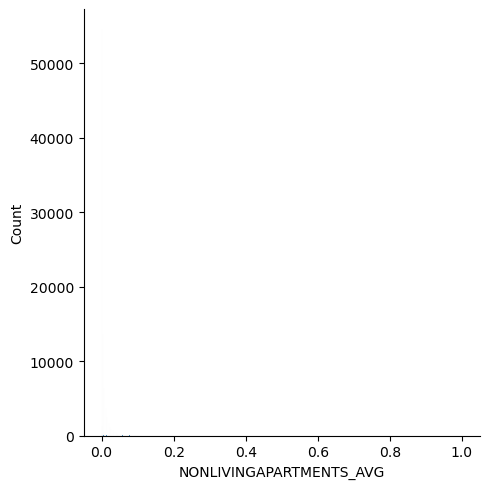

57


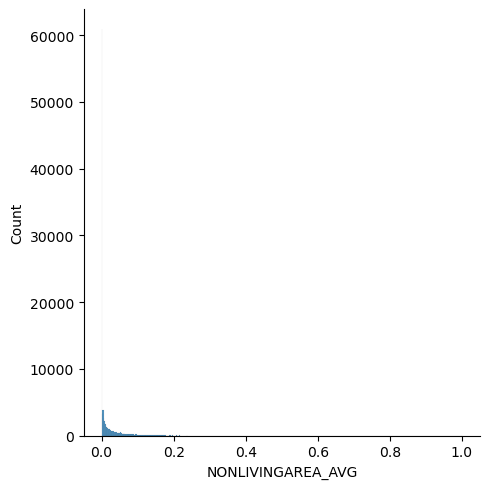

In [14]:
for i in range(44,58):
    print(i)
    sns.displot(df[df.columns[i]])
    plt.show()

In [64]:
crr = df.iloc[:,44:58].corr()

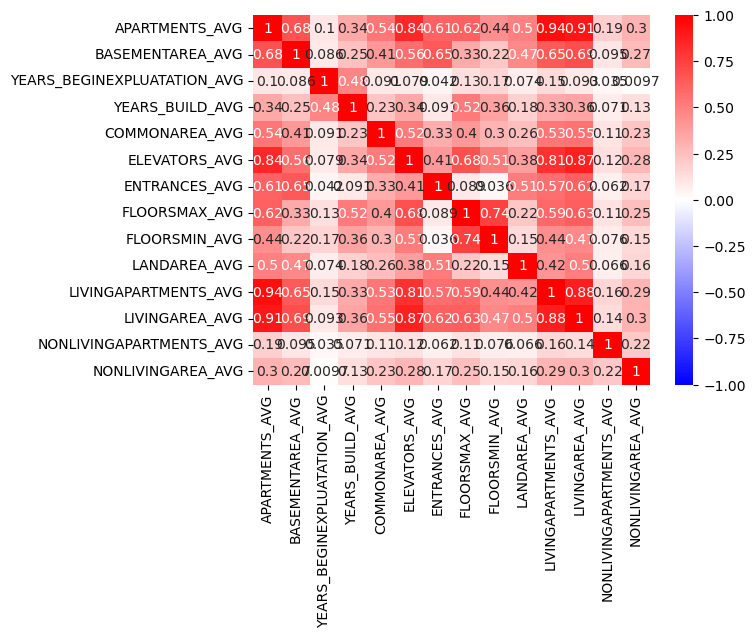

In [65]:
sns.heatmap(crr, annot=True, vmax=1, vmin=-1, cmap='bwr')
plt.show()

In [66]:
for i in range(44,58):
    if i in [44,48,49,50,51,52,54,55,57]:
        df[df.columns[i]] = df[df.columns[i]].fillna(df[df.columns[i]].median())
    else:
        df[df.columns[i]] = df[df.columns[i]].fillna(df[df.columns[i]].mean())

` based on the distribution graph, replaced missing value with median,  
where data distribution is skewed, else replacing with average value` 

116
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64


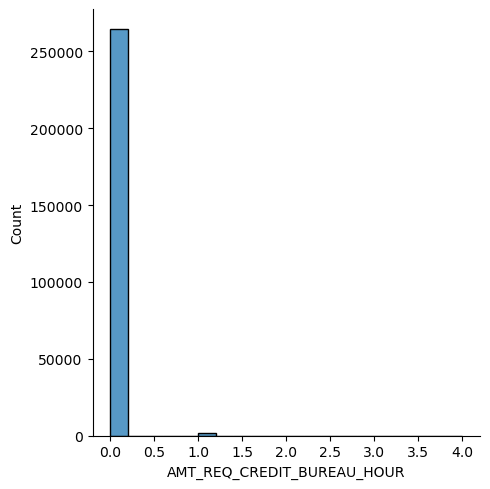

117
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64


118
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64


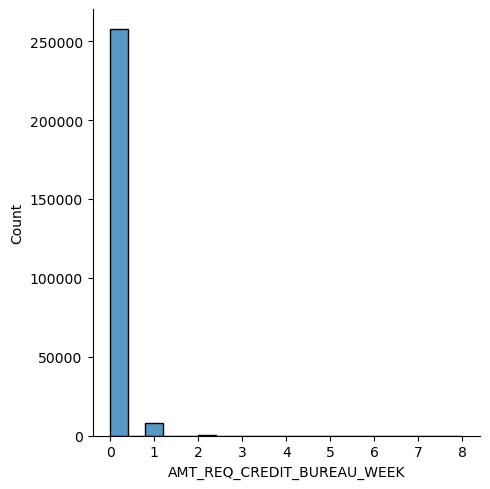

119
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64


120
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64


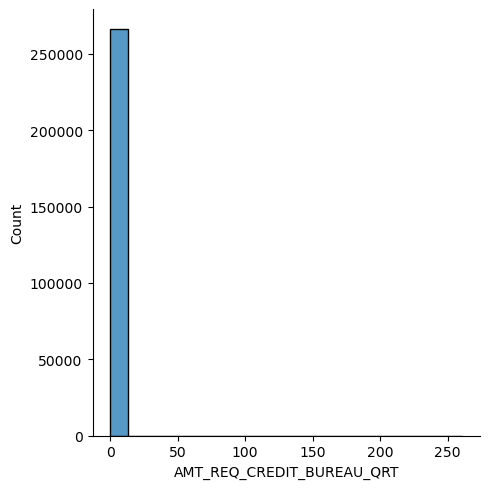

121
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64


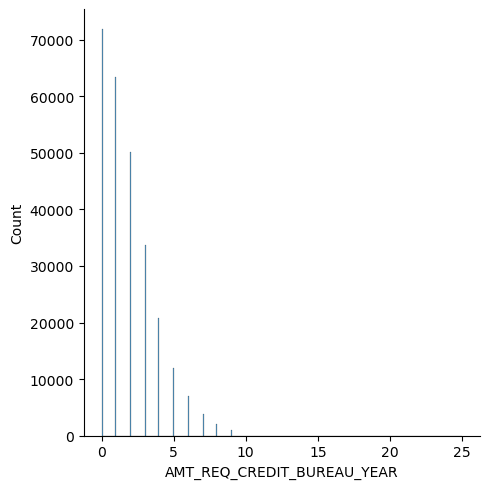

In [67]:
for i in range(116,122):
    print(i)
    print(df.iloc[:,i].value_counts())
    sns.displot(df[df.columns[i]])
    plt.show()

In [68]:
for i in range(116,122):
    df[df.columns[i]] = df[df.columns[i]].fillna(df[df.columns[i]].mode().iloc[0])

`replacing missing inqueries related column with mode(0), considering 
the frequecy of inquries
`

In [69]:
# converting negative number of days to positive
for i in range(17,21):
    df[df.columns[i]] = df[df.columns[i]]*-1

In [70]:
#Dropping Irrevelant Columns (Feature Selection)

col_ph_email_flg = list(range(22,28)) # phone, email flag
col_processing_address = list(range(32,40)) #application processing time, address check
col_specific = [0,20,21,41,43] # SK_ID,applicant id publish days, Car Age, ext source 1 and 3 contains more nulls
col_build_char = list(range(58,91)) # building specific column (median, mode)
col_phone_doc = list(range(95,116)) # documents flag_2 to 21
col_additional_appartment_feature = list(range(45,58)) # based on correlation and high volumne of data, only selecting appartment avg size
columns_to_drop = col_ph_email_flg + col_processing_address + col_build_char + col_phone_doc + col_specific + col_additional_appartment_feature


In [71]:
df_v1= df.copy()

In [72]:
df = df.drop(df.columns[columns_to_drop], axis=1)

In [73]:
df.shape

(307511, 36)

In [74]:
df.isnull().mean()*100

TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
OCCUPATION_TYPE                0.000000
CNT_FAM_MEMBERS                0.000650
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
ORGANIZATION_TYPE              0.000000
EXT_SOURCE_2                   0.214626


In [75]:
df.dropna(inplace=True)

`now missing records percentage is very less, so dropping these records`

In [76]:
df.shape

(304531, 36)

In [77]:
df.isnull().sum().sum()

0

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       304531 non-null  int64  
 1   NAME_CONTRACT_TYPE           304531 non-null  object 
 2   CODE_GENDER                  304531 non-null  object 
 3   FLAG_OWN_CAR                 304531 non-null  object 
 4   FLAG_OWN_REALTY              304531 non-null  object 
 5   CNT_CHILDREN                 304531 non-null  int64  
 6   AMT_INCOME_TOTAL             304531 non-null  float64
 7   AMT_CREDIT                   304531 non-null  float64
 8   AMT_ANNUITY                  304531 non-null  float64
 9   AMT_GOODS_PRICE              304531 non-null  float64
 10  NAME_TYPE_SUITE              304531 non-null  object 
 11  NAME_INCOME_TYPE             304531 non-null  object 
 12  NAME_EDUCATION_TYPE          304531 non-null  object 
 13 

In [79]:
df.sample(5)

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
44357        0         Cash loans           F            N               N   
111251       0         Cash loans           M            N               Y   
198036       0         Cash loans           F            N               Y   
302955       0    Revolving loans           F            N               Y   
242132       0         Cash loans           M            N               Y   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
44357              1          189000.0    587623.5      36081.0   
111251             0          171000.0    543735.0      26158.5   
198036             4          270000.0    446931.0      28692.0   
302955             2          112500.0    202500.0      10125.0   
242132             3          180000.0    473760.0      50400.0   

        AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
44357          544500.0   Unaccompanied         State servant   
111251         486000.0   Unaccompanied  Commercial associate   
198036         369000.0   Unaccompanied         State servant   
302955         202500.0   Unaccompanied               Working   
242132         450000.0   Unaccompanied         State servant   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
44357                Higher education               Married   
111251  Secondary / secondary special               Married   
198036               Higher education             Separated   
302955  Secondary / secondary special               Married   
242132               Higher education  Single / not married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
44357    Office apartment                    0.046220       12933   
111251  House / apartment                    0.018029       18801   
198036  House / apartment                    0.006629       14143   
302955  House / apartment                    0.028663       11464   
242132  House / apartment                    0.004960       17494   

        DAYS_EMPLOYED  DAYS_REGISTRATION     OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
44357            1185              734.0          Core staff              3.0   
111251           3474            11319.0  Low-skill Laborers              2.0   
198036            341              480.0             Drivers              5.0   
302955           2151             3160.0         Sales staff              4.0   
242132           2011             4617.0            Laborers              4.0   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY ORGANIZATION_TYPE  \
44357                      1                            1          Military   
111251                     3                            3       Agriculture   
198036                     2                            2             Other   
302955                     2                            2     Self-employed   
242132                     2                            2            School   

        EXT_SOURCE_2  APARTMENTS_AVG  OBS_30_CNT_SOCIAL_CIRCLE  \
44357       0.690664          0.0876                       0.0   
111251      0.027957          0.0876                       0.0   
198036      0.589435          0.0722                       0.0   
302955      0.597076          0.1979                       0.0   
242132      0.443320          0.0876                       0.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
44357                        0.0                       0.0   
111251                       0.0                       0.0   
198036                       0.0                       0.0   
302955                       0.0                       0.0   
242132                       0.0                       0.0   

        DEF_60_CNT_SOCIAL_CIRCLE  AMT_REQ_CREDIT_BUREAU_HOUR  \
44357                        0.0                         0.0   
111251                       0.0                         0.0   
198036                     

In [80]:
df.TARGET.value_counts()

0    279864
1     24667
Name: TARGET, dtype: int64

In [81]:
x = df.drop(['TARGET'], axis=1)
y = df.TARGET

In [82]:
X_dummies = pd.get_dummies(x, drop_first=True)

In [83]:
X_dummies.shape

(304531, 129)

In [84]:
train_X, test_X, train_y, test_y = train_test_split(X_dummies,y,test_size=0.3)

` our focus will be to reduce faslse negative,
therefore it is a Recall problem`

### SVM

In [85]:
svc = SVC()
svc.fit(train_X, train_y)

SVC()

In [86]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(test_y,svc.predict(test_X)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     83911
           1       0.00      0.00      0.00      7449

    accuracy                           0.92     91360
   macro avg       0.46      0.50      0.48     91360
weighted avg       0.84      0.92      0.88     91360



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
#Hyperparameter Tunning for SVM

In [89]:
param_grid = {
    'C':[0.1, 1, 10, 100],
    'gamma':[5, 0.1, 0.001, 0.00001]
}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='recall', verbose=2, n_jobs=4, return_train_score=True)
grid.fit(train_X, train_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


KeyboardInterrupt: 

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
print(classification_report(test_y,grid.predict(test_X)))

### Random Forest

In [ ]:
rf = RandomForestClassifier(class_weight={0:0.2, 1:0.8})
rf.fit(train_X, train_y)

In [ ]:
rf.score(train_X, train_y)

In [ ]:
rf.score(test_X, test_y)

In [ ]:
print(classification_report(test_y, rf.predict(test_X)))

In [ ]:
#Hyperparameter Tunning for Random Forest

In [ ]:
param_grid = {
    'n_estimators' : [50, 100],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3,5,7], 
    'min_samples_leaf' : [3,5,7]
}

In [ ]:
grid = GridSearchCV(RandomForestClassifier(class_weight={0:0.2, 1:0.8}), param_grid, cv=5, scoring='recall', verbose=2)
grid.fit(train_X,train_y)

In [ ]:
print(classification_report(test_y, grid.predict(test_X)))